# LSTM(Long Short Term Memory)
* LSTM : 장기의존성 문제 해결을 위한 구조 
    * RNN에 비해 복잡한 구조를 가짐
    * 가장 큰 특징은 출력외에 LSTM 셀 사이에서만 공유되는 셀 상태(cell state)를 가짐
    * 타임스텝을 가로지르며 셀 상태가 보존되기 때문에 장기의존성 문제를 해결
* tanh/sigmoid : LSTM의 활성화 함수 

## 곱셈 문제 
* 고려해야 할 실수의 범위가 100개이고 그중에서 2개의 숫자만 곱하는 문제 

### SimpleRNN 레이어를 이용해 문제 풀기 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

* np.random.rand(100) : 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
* np.random.choice(100, 2, replace=False) : 100중 2개를 추출하는데 중복없이 추출 
* np.zeros(100) : 100개의 0을 가진 배열 생성 
* zeros[idx] = 1 : 리스트중에 마킹 인덱스(idx)가 저장된 부분만 1로 설정해 원-핫 인코딩 벡터를 만듭니다.
* list(zip(zeros, lst)) : list(zip([1, 2, 3], [4, 5, 6])) --> [(1, 4), (2, 5), (3, 6)]
* np.prod(lst[idx]) : 리스트의 각 항목 곱하기 수행 b = array([1, 2, 3, 4]) --> np.prod(b)  # 1*2*3*4 --> 24m

In [2]:
X = []   # 입력 데이터 리스트 
Y = []   # 결과 리스트 

for i in range(3000):
    lst = np.random.rand(100)    
    idx = np.random.choice(100, 2, replace=False)  
    zeros = np.zeros(100)  
    zeros[idx] = 1  
    
    X.append(np.array(list(zip(zeros, lst))))  
    Y.append(np.prod(lst[idx]))   

print(len(X[0]))
print(X[0])
print(Y[0])

100
[[0.         0.85265963]
 [0.         0.92366239]
 [0.         0.33875788]
 [0.         0.63821996]
 [0.         0.9942555 ]
 [0.         0.32615177]
 [0.         0.94567131]
 [0.         0.73042496]
 [0.         0.80717876]
 [0.         0.36678179]
 [0.         0.14694767]
 [0.         0.58666322]
 [0.         0.83548502]
 [0.         0.18257659]
 [0.         0.3840895 ]
 [0.         0.44428367]
 [0.         0.9443953 ]
 [0.         0.12393103]
 [0.         0.67121453]
 [0.         0.75836777]
 [0.         0.67955626]
 [0.         0.99661686]
 [0.         0.73774398]
 [0.         0.33464618]
 [0.         0.69549235]
 [0.         0.58988761]
 [0.         0.65519904]
 [0.         0.53510701]
 [0.         0.69968767]
 [0.         0.22890044]
 [0.         0.72459548]
 [0.         0.48739886]
 [0.         0.94550033]
 [0.         0.58459693]
 [0.         0.85958197]
 [0.         0.40084757]
 [0.         0.40880709]
 [0.         0.86021816]
 [0.         0.22806064]
 [0.         0.514664

#### 모델 설정 & 컴파일 
* 기존의 문제보다 복잡하기 때문에 뉴런의 수도 늘리고 SimpleRNN레이어를 2층으로 겹친 모델 구조 사용
* __return_sequences=True__ : 레이어의 출력을 다음 레이어로 그대로 넘겨줌
    * RNN 레이어를 겹치기 위해서는 return_sequences를 True로 설정한다. 

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(units = 30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units = 30),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = 'adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


#### SimpleRNN 네트워크 학습
* list인 자료형을 numpy.ndarray으로 변환해야 한다. 
* 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.

In [4]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.1042 - val_loss: 0.0539
Epoch 2/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0484 - val_loss: 0.0509
Epoch 3/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0475 - val_loss: 0.0509
Epoch 4/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0468 - val_loss: 0.0505
Epoch 5/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0487 - val_loss: 0.0548
Epoch 6/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0477 - val_loss: 0.0504
Epoch 7/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0474 - val_loss: 0.0500
Epoch 8/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0472 - val_loss: 0.0511
Epoch 9/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0479 - val_loss: 0.0518
Epoch 10

2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0360 - val_loss: 0.0554
Epoch 78/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0367 - val_loss: 0.0581
Epoch 79/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0360 - val_loss: 0.0567
Epoch 80/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0362 - val_loss: 0.0557
Epoch 81/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0358 - val_loss: 0.0576
Epoch 82/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0365 - val_loss: 0.0584
Epoch 83/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0356 - val_loss: 0.0563
Epoch 84/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0341 - val_loss: 0.0560
Epoch 85/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0344 - val_loss: 0.0583
Epoch 86/100
2048/2048 [==============================] - 4

#### 그래프로 비교하기 

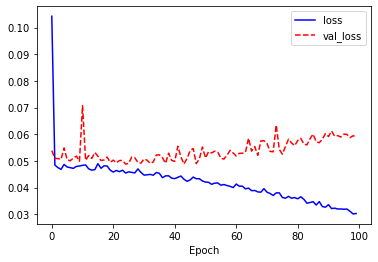

In [5]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

####  모델 평가하기

In [6]:
model.evaluate(X[2560:], Y[2560:])

440/440 [==============================] - 0s 748us/sample - loss: 0.0571


0.05709744651209225

#### 예측하고 정확도 측정하기
* 오차가 0.04 이상이면 오답으로 처리
* (lambda i : "오답" if abs(prediction[i][0] - Y[2560+i]) > 0.04 else "정답")(i)

In [7]:
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]),"\t", (lambda i : "오답" if abs(prediction[i][0] - Y[2560+i]) > 0.04 else "정답")(i)  )
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

0.009417791336498045 	 0.30178005 	diff: 0.29236225369600316 	 오답
0.6548937886537675 	 0.19472584 	diff: 0.46016794736996924 	 오답
0.5644796207629784 	 0.2819862 	diff: 0.2824934139930352 	 오답
0.2634345672137859 	 0.24056967 	diff: 0.02286490118576312 	 정답
0.21979869126607546 	 0.049721282 	diff: 0.17007740929056772 	 오답
correctness: 15.0 %


### LSTM 레이어 사용하기 
#### LSTM 레이어를 사용한 곱셈 문제 모델 정의

In [8]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.LSTM(units = 30),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = 'adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


#### 학습 

In [9]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0473 - val_loss: 0.0500
Epoch 2/100
2048/2048 [==============================] - 0s 237us/sample - loss: 0.0467 - val_loss: 0.0498
Epoch 3/100
2048/2048 [==============================] - 1s 252us/sample - loss: 0.0468 - val_loss: 0.0502
Epoch 4/100
2048/2048 [==============================] - 0s 243us/sample - loss: 0.0463 - val_loss: 0.0499
Epoch 5/100
2048/2048 [==============================] - 0s 238us/sample - loss: 0.0464 - val_loss: 0.0502
Epoch 6/100
2048/2048 [==============================] - 1s 253us/sample - loss: 0.0463 - val_loss: 0.0499
Epoch 7/100
2048/2048 [==============================] - 1s 285us/sample - loss: 0.0464 - val_loss: 0.0500
Epoch 8/100
2048/2048 [==============================] - 1s 250us/sample - loss: 0.0466 - val_loss: 0.0501
Epoch 9/100
2048/2048 [==============================] - 0s 241us/sample - loss: 0.0465 - val_loss:

2048/2048 [==============================] - 0s 242us/sample - loss: 5.0146e-04 - val_loss: 6.7365e-04
Epoch 76/100
2048/2048 [==============================] - 1s 246us/sample - loss: 3.8314e-04 - val_loss: 4.3657e-04
Epoch 77/100
2048/2048 [==============================] - 0s 240us/sample - loss: 4.7120e-04 - val_loss: 0.0011
Epoch 78/100
2048/2048 [==============================] - 0s 239us/sample - loss: 4.4991e-04 - val_loss: 5.1085e-04
Epoch 79/100
2048/2048 [==============================] - 0s 237us/sample - loss: 4.5133e-04 - val_loss: 4.0353e-04
Epoch 80/100
2048/2048 [==============================] - 0s 239us/sample - loss: 3.8486e-04 - val_loss: 4.8426e-04
Epoch 81/100
2048/2048 [==============================] - 0s 238us/sample - loss: 5.3493e-04 - val_loss: 3.7655e-04
Epoch 82/100
2048/2048 [==============================] - 0s 240us/sample - loss: 2.8338e-04 - val_loss: 3.2893e-04
Epoch 83/100
2048/2048 [==============================] - 0s 236us/sample - loss: 3.8448e

#### 그래프로 비교하기 

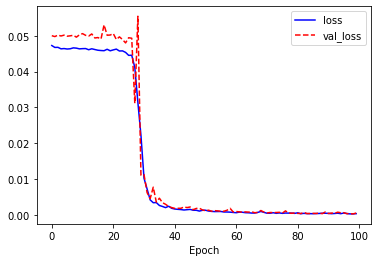

In [10]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 모델 평가하기

In [11]:
model.evaluate(X[2560:], Y[2560:])

440/440 [==============================] - 0s 907us/sample - loss: 5.2292e-04


0.0005229192362590269

#### 예측하고 정확도 측정하기

In [12]:
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]),"\t", (lambda i : "오답" if abs(prediction[i][0] - Y[2560+i]) > 0.04 else "정답")(i)  )
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

0.009417791336498045 	 0.010211308 	diff: 0.0007935162189390433 	 정답
0.6548937886537675 	 0.67399883 	diff: 0.019105044048869257 	 정답
0.5644796207629784 	 0.5649611 	diff: 0.00048145501979746097 	 정답
0.2634345672137859 	 0.27749836 	diff: 0.014063797234761477 	 정답
0.21979869126607546 	 0.24794164 	diff: 0.02814295173357359 	 정답
correctness: 93.18181818181817 %
